# Library

In [1]:
from Python_Library.library import MLP
import matplotlib.pyplot as plt

## Cas de test

### Classification Linéaire avec un PMC (sans couche cachée)

In [8]:
test_1_all_samples_inputs = [
    [0, 0],
    [0, 1],
    [1, 0]
]
test_1_all_samples_expected_outputs = [
    [1],
    [-1],
    [-1]
]

In [9]:
test1_mlp = MLP([2, 1])

In [10]:
for sample_inputs in test_1_all_samples_inputs:
  print(test1_mlp.predict(sample_inputs, True))

[-0.5726771980675031]
[-0.7760167902280639]
[-0.813246250449239]


In [11]:
data = test1_mlp.fit(test_1_all_samples_inputs, test_1_all_samples_expected_outputs, True, 100, 0.01)

In [6]:
print(data)

{'loss': [1.5818071454272569, 0.5543407139807225, 0.5447132387521862, 0.5353207695345098, 0.5261572066809092, 1.5913533318796533, 1.5362603674857707, 0.5487051570502555, 1.497991756994661, 1.4441500491381378], 'accuracy': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]}


In [6]:
for sample_inputs in test_1_all_samples_inputs:
  print(test1_mlp.predict(sample_inputs, True))

[0.15412798506280195]
[-0.4784760037938338]
[0.11869545974384102]


### Classification Non Linéaire (XOR) avec un PMC

In [2]:
test_2_all_samples_inputs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
]
test_2_all_samples_expected_outputs = [
    [-1],
    [1],
    [1],
    [-1]
]

In [3]:
test2_mlp = MLP([2, 2, 1])

In [4]:
for sample_inputs in test_2_all_samples_inputs:
  print(test2_mlp.predict(sample_inputs, True))

[-0.1465149427824706]
[0.575177383695049]
[-0.4724421415888447]
[0.3646451610248691]


In [5]:
test2_mlp.fit(test_2_all_samples_inputs, test_2_all_samples_expected_outputs, True, 100000, 0.01)

In [6]:
for sample_inputs in test_2_all_samples_inputs:
  print(test2_mlp.predict(sample_inputs, True))

[-0.9736293378370515]
[0.9744103389798404]
[-0.001015576182950436]
[0.0014669634727310997]


### Régression Linéaire avec un PMC (sans couche cachée)

In [13]:
test_3_all_samples_inputs = [
    [0, 0],
    [0, 1],
    [1, 0]
]
test_3_all_samples_expected_outputs = [
    [42],
    [51],
    [19]
]

In [14]:
test3_mlp = MLP([2, 1])

In [15]:
for sample_inputs in test_3_all_samples_inputs:
  print(test3_mlp.predict(sample_inputs, False))

[-0.3571417043225156]
[0.2647861855530549]
[0.5746175995623426]


In [16]:
test3_mlp.fit(test_3_all_samples_inputs, test_3_all_samples_expected_outputs, False, 100000, 0.01)

In [17]:
for sample_inputs in test_3_all_samples_inputs:
  print(test3_mlp.predict(sample_inputs, False))

[41.999999999999645]
[51.000000000000085]
[19.000000000000178]


### Régression Non Linéaire avec un PMC

In [18]:
test_4_all_samples_inputs = [
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
]
test_4_all_samples_expected_outputs = [
    [42],
    [51],
    [19],
    [5],
]

In [19]:
test4_mlp = MLP([2, 5, 1])

In [20]:
for sample_inputs in test_4_all_samples_inputs:
  print(test4_mlp.predict(sample_inputs, False))

[0.30410099877403096]
[0.21404427119358904]
[0.3456457229367757]
[0.24451115338824014]


In [21]:
test4_mlp.fit(test_4_all_samples_inputs, test_4_all_samples_expected_outputs, False, 100000, 0.01)

In [22]:
for sample_inputs in test_4_all_samples_inputs:
  print(test4_mlp.predict(sample_inputs, False))


[42.0]
[50.999999999999986]
[19.0]
[5.000000000000002]


## Test function categorical accuracy

In [2]:
test5_inputs = [
    [0, 0],
    [0, 1],
    [1, 0]
]

test5_outputs = [
    [-1, -1],
    [-1, -1],
    [1, -1]
]

In [3]:
test5_mlp = MLP([2,2])

In [4]:
data = test5_mlp.fit(test5_inputs, test5_outputs, True, 100, 0.2)

In [5]:
print(data['accuracy'][-1])

0.91


In [6]:
print("----- predictions ------")
for sample in test5_inputs:
    print(test5_mlp.predict(sample, True))

----- predictions ------
[-0.7264390843267738, -0.8844574003286164]
[-0.8700052214989659, -0.9644653732019977]
[0.751357735470274, -0.9687728598802668]


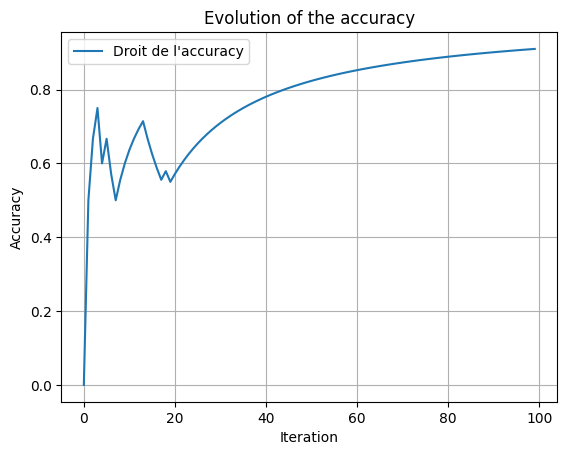

In [7]:
plt.plot(range(len(data['accuracy'])), data['accuracy'], label='Droit de l\'accuracy')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.title('Evolution of the accuracy')
plt.legend()
plt.grid()
plt.show()

## MNIST DATASET

In [23]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

In [24]:
# load MNIST data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape)
print(y_train.shape)

# Preprocessing
x_train = x_train / 255.0
x_test = x_test / 255.0

x_train_mean = np.mean(x_train)
x_train_std = np.std(x_train)
x_train_standardized = (x_train - x_train_mean) / x_train_std

x_test_standardized = (x_test - x_train_mean) / x_train_std

y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Track data type
data_type = x_train.dtype
print(f"Data type : {data_type}")
label_type = x_test.dtype
print(f"Data type : {label_type}")

(60000, 28, 28)
(60000,)
Data type : float64
Data type : float64


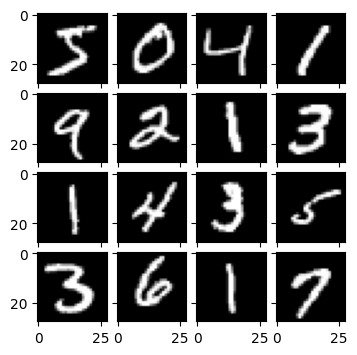

In [25]:
im_list = []
n_samples_to_show = 16
c = 0
for i in range(n_samples_to_show):
  im_list.append(x_train[i])

fig = plt.figure(figsize=(4., 4.))
grid = ImageGrid(fig, 111, nrows_ncols=(4,4), axes_pad=0.1)

for ax, im in zip(grid, im_list):
  ax.imshow(im, 'gray')

plt.show()

In [29]:
model = MLP([512, 256, 64, 32, 10])
model.fit(x_train, y_train, True, 10, 0.01)

IndexError: index 28 is out of bounds for axis 0 with size 28

In [28]:
for sample_inputs in x_test_standardized:
  print(model.predict(sample_inputs, True))


IndexError: index 28 is out of bounds for axis 0 with size 28